<a href="https://colab.research.google.com/github/Ksusssa/NerLab/blob/main/NER4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import recall_score

In [29]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [30]:
labels_cifar100 =  ['apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 'bowls', 'boy', 'bridge', 'bus', 'butterfly', 
           'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cups', 
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer keyboard', 
           'lamp', 'lawn mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple tree', 'motorcycle', 'mountain', 'mouse', 'mushrooms', 
           'oak_tree', 'oranges', 'orchids', 'otter', 'palm_tree', 'pears', 'pickup truck', 'pine_tree', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'roses', 
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflowers', 'sweet peppers', 
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulips', 'turtle', 
           'wardrobe', 'whale', 'willow tree', 'wolf', 'woman', 'worm']

In [31]:
x_data = np.vstack((x_train, x_test))
y_data = np.vstack((y_train, y_test))

label_list = []
x_data_new = []
y_data_new = []

for i in range (len(y_data)):
  label_list = [ labels_cifar100.index(item) for item in ['bottles', 'cans', 'cups']]
  for j in range(len(label_list)):
    if(y_data[i] == label_list[j]):
      x_data_new.append(x_data[i])
      y_data_new.append(y_data[i])

x_train_data = np.array(x_data_new).reshape(len(x_data_new) , 32 , 32 , 3)
y_train_data = np.array(y_data_new).reshape(len(y_data_new) , 1)
x_test_data = np.array(x_data_new).reshape(len(x_data_new) , 32 , 32 , 3)
y_test_data = np.array(y_data_new).reshape(len(y_data_new) , 1)

print(x_test_data.shape)
print(y_test_data.shape)

(1800, 32, 32, 3)
(1800, 1)


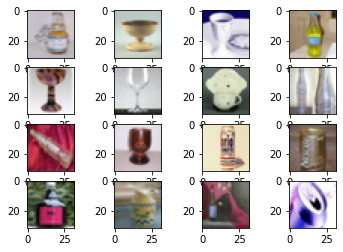

In [32]:
for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.imshow(x_train_data[i], cmap="binary")
 
plt.show()

In [33]:
x_train_data[0]

array([[[0.69803922, 0.65882353, 0.69019608],
        [0.68627451, 0.64705882, 0.67843137],
        [0.68627451, 0.64705882, 0.67843137],
        ...,
        [0.65882353, 0.62352941, 0.65098039],
        [0.65882353, 0.61960784, 0.65098039],
        [0.65882353, 0.62352941, 0.65490196]],

       [[0.72941176, 0.68627451, 0.72156863],
        [0.71372549, 0.6745098 , 0.70588235],
        [0.71372549, 0.6745098 , 0.70588235],
        ...,
        [0.69803922, 0.65882353, 0.69019608],
        [0.69803922, 0.65882353, 0.69019608],
        [0.69803922, 0.66666667, 0.69411765]],

       [[0.74509804, 0.70588235, 0.7372549 ],
        [0.7372549 , 0.69803922, 0.72941176],
        [0.7372549 , 0.69803922, 0.72941176],
        ...,
        [0.72156863, 0.68235294, 0.71372549],
        [0.72156863, 0.68235294, 0.71372549],
        [0.7254902 , 0.69019608, 0.71764706]],

       ...,

       [[0.97254902, 0.95686275, 0.94509804],
        [0.95294118, 0.9372549 , 0.9254902 ],
        [0.95294118, 0

In [34]:
def getTrainData():
  x_data_train = []
  y_data_train = []
  for i in range(len(x_train_data)):
    if(y_train_data[i] == 9 or y_train_data[i] == 11 or y_train_data[i] == 12):
      x_data_train.append(np.resize(x_train_data[i], (24,24,3)).reshape(-1))
      y_data_train.append(np.resize(y_train_data[i], (24,24,3)).reshape(-1))

  return np.array(x_data_train), np.array(y_data_train)

def getTestData():
  x_data_test = []
  y_data_test = []
  for i in range(len(x_test_data)):
    if(y_test_data[i] == 9 or y_train_data[i] == 11 or y_train_data[i] == 12):
      x_data_test.append(np.resize(x_test_data[i], (24,24,3)).reshape(-1))
      y_data_test.append(np.resize(y_test_data[i], (24,24,3)).reshape(-1))
  
  return np.array(x_data_test), np.array(y_data_test)

x_train, y_train = getTrainData()
x_test, y_test = getTestData()

print(x_train[0].shape)

(1728,)


In [35]:
import pandas as pd

learning_rate = 0.1
iterations = 500
N = y_train.size
 
# Input features
input_size = 1728
 
# Hidden layers 
hidden_size = 2
 
# Output layer
output_size = 1728
 
results = pd.DataFrame(columns=["mse", "accuracy"])


In [36]:
np.random.seed(10)
 
# Hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   
 
# Output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

W1.shape

(1728, 2)

In [37]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
     
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [38]:
for itr in range(iterations):    
     
    # Implementing feedforward propagation on hidden layer
    Z1 = np.dot(x_train, W1)
    A1 = sigmoid(Z1)
 
    # Implementing feed forward propagation on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
     
     
    # Calculating the error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
     
    # Backpropagation phase
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)
 
    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)
 
     
    # Updating the weights
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(x_train.T, dW2) / N
 
    W2 = W2 - learning_rate * W2_update
    
    W1 = W1 - learning_rate * W1_update

    print(f"Iteration: {itr}")

Iteration: 0
Iteration: 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
Iteration: 73


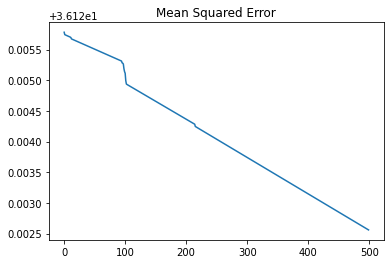

In [39]:
results.mse.plot(title="Mean Squared Error")

In [40]:
Z1 = np.dot(x_test, W1)
A1 = sigmoid(Z1)
 
Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)
 
acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.8233333333333334


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
